References:
1. Panduan Lab 5

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import cv2

from scipy import fftpack as fp
from skimage import color
from skimage import filters
from skimage import io
from skimage import morphology
from skimage import util
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

## **1. [50] Thresholding**

### Terdapat suatu gambar tools.jpg yang terdiri dari beberapa peralatan yang berbeda. Lakukan pengolahan citra tersebut dalam citra grayscale.

### a. [10] Lakukan Simple Global Thresholding pada citra tersebut

hint: gunakan library OpenCV

cv2.threshold(img,x,y,cv.THRESH_BINARY)

nilai x dan y berada dalam range nilai citranya

Misalnya: cv2.threshold(img,127,255,cv.THRESH_BINARY)


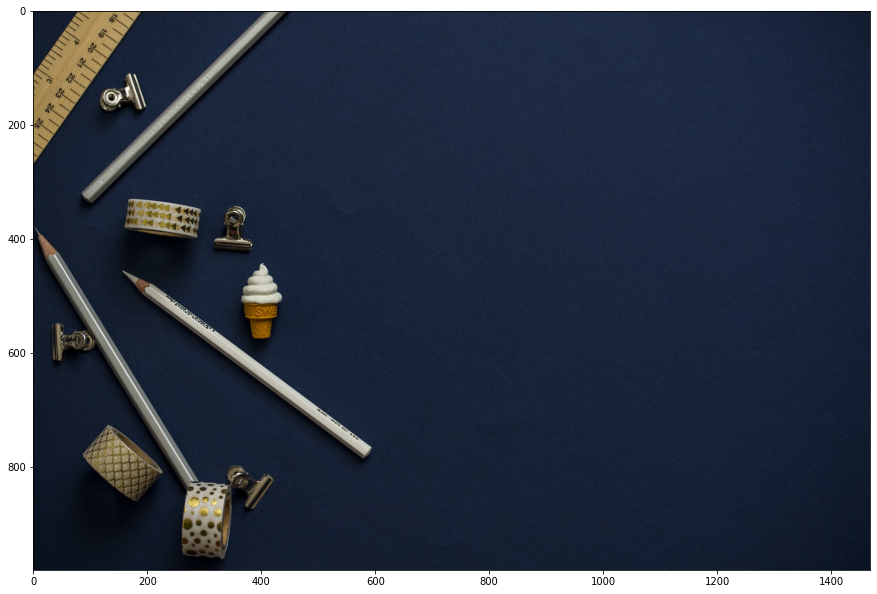

In [92]:
# Mengimpor gambar
tools_img = io.imread('Tugas Lab 5 - images/tools.jpg')

plt.figure(figsize=(15, 15))
plt.imshow(tools_img)

(981, 1469)


Text(0.5, 1.0, 'w/ Simple Global Thresholding')

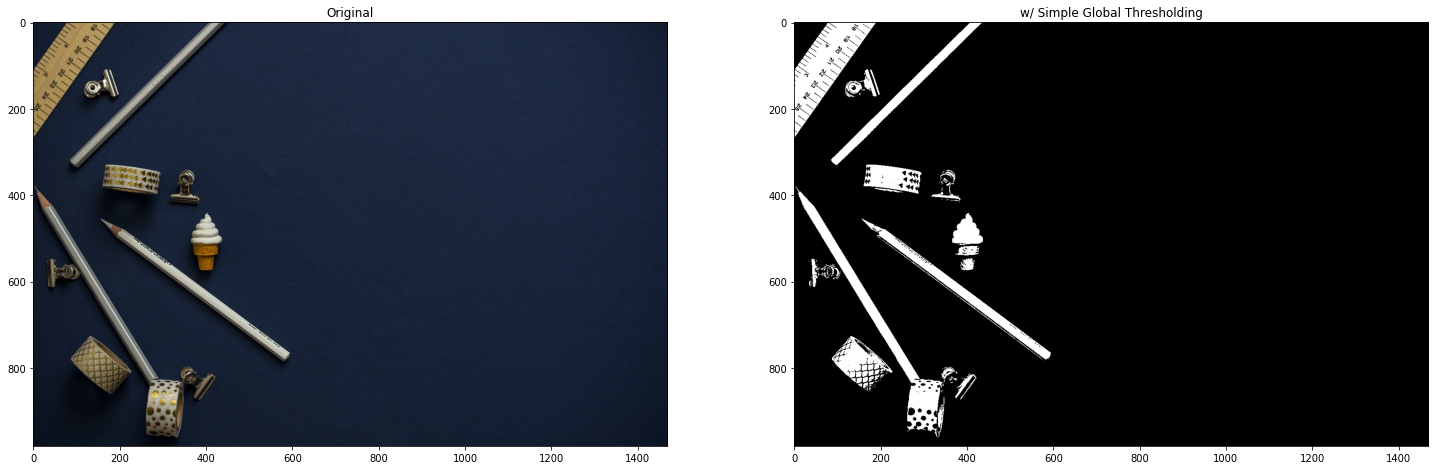

In [93]:
tools_img_gray = color.rgb2gray(tools_img)
tools_img_gray_ubyte = util.img_as_ubyte(tools_img_gray)

# Simple global tresholding w/o edge det.
print(tools_img_gray_ubyte.shape)
_, segmented = cv2.threshold(tools_img_gray_ubyte, 75, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(25, 25))

plt.subplot(1, 2, 1)
plt.imshow(tools_img, cmap="gray")
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap="gray")
plt.title('w/ Simple Global Thresholding')

### b. [10] Lakukan Otsu’s Thresholding (beserta histogramnya) pada citra tersebut

Text(0.5, 1.0, 'w/ Otsu Thresholding')

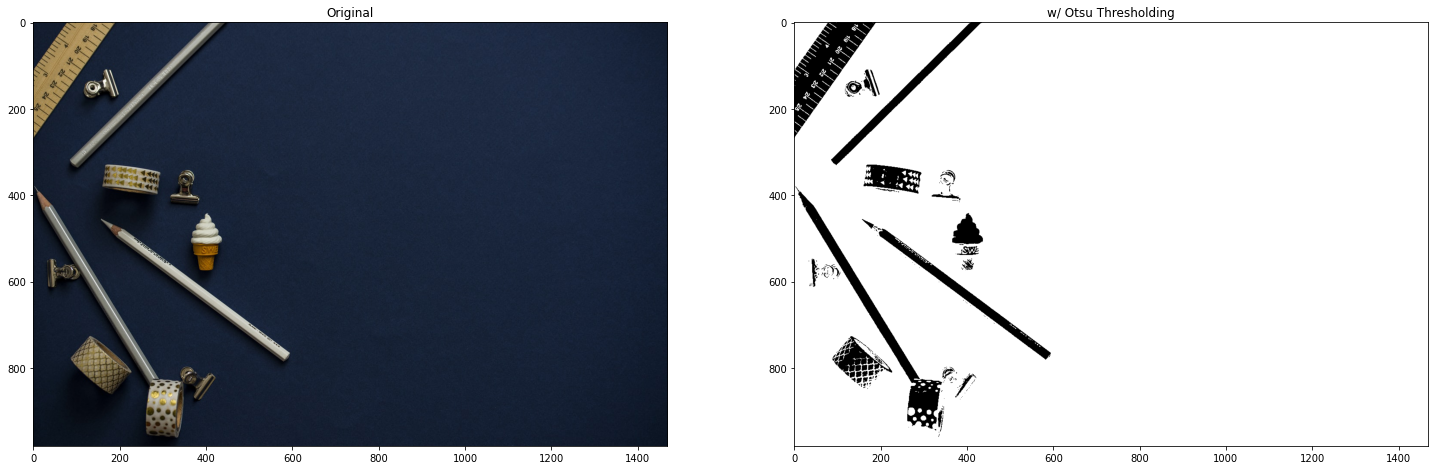

In [94]:
tools_img_otsu = filters.threshold_otsu(tools_img_gray_ubyte)
S = util.img_as_float(tools_img_gray_ubyte > tools_img_otsu)

plt.figure(figsize=(25, 25))

plt.subplot(1, 2, 1)
plt.imshow(tools_img, cmap="gray")
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(1-S, cmap="gray")
plt.title('w/ Otsu Thresholding')

### c. [15] Jelaskan perbedaan hasil dari simple global thresholding pada (a) dan Otsu’s Thresholding pada (b) dan alasan mengapa perbedaan tersebut bisa terjadi.

Text(0.5, 1.0, 'w/ Otsu Thresholding')

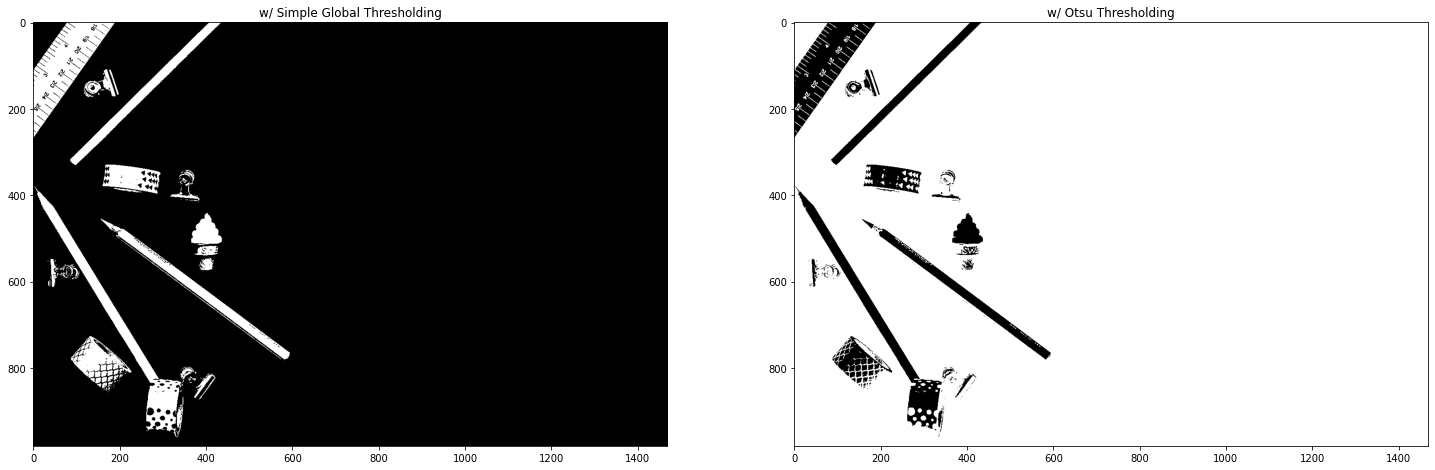

In [95]:
plt.figure(figsize=(25, 25))

plt.subplot(1, 2, 1)
plt.imshow(segmented, cmap="gray")
plt.title('w/ Simple Global Thresholding')

plt.subplot(1, 2, 2)
plt.imshow(1-S, cmap="gray")
plt.title('w/ Otsu Thresholding')

Pada percobaan poin a dan b, terlihat bahwa kedua pendekatan relatif sudah berhasil melakukan segmentasi pada objek-objek yang ada pada gambar dengan baik. Hal ini dinilai berdasarkan hasil dari kedua pendekatan yang berhasil menrekognisi keduabelas objek yang ada.

Namun apabila membandingkan secara detil, terlihat bahwa dalam kasus ini, pendekatan secara Simple Global Thresholding terlihat **lebih detil** dan **lebih berhasil dalam membuat segmentasi masing-masing objek secara utuh** dibanding Otsu's Distribution-Based Thresholding.

Hal ini bisa jadi karena terjadi kesalahan pada pendekatan Otsu dalam mengelompokkan piksel yang redup menjadi foreground.

### d. [15] Tentukan metode mana yang lebih optimal untuk citra ini dan mengapa?

Berdasarkan pertimbangan pada butir c di atas (hasil pada Simple Global Thresholding lebih detil dan lebih berhasil dalam membuat segmentasi objek secara utuh), maka **pendekatan Simple Global Thresholding dalam kasus ini dinilai lebih optimal**.

## 2. **[50] Clustering**

### Diberikan sebuah citra mountain.jpg.

### a. [25] Gunakan algoritma SLIC untuk melakukan segmentasi, lakukan percobaan untuk 10, 50, dan 100 segmen.

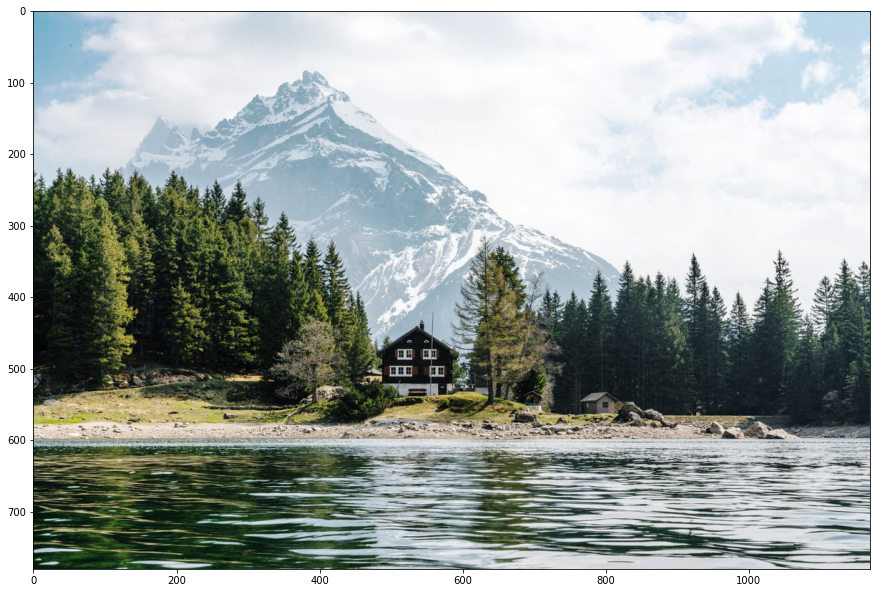

In [96]:
# Mengimpor gambar
mountain_img = io.imread('Tugas Lab 5 - images/mountain.jpg')

plt.figure(figsize=(15, 15))
plt.imshow(mountain_img)

/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_59205/1309454325.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic_50 = slic(mountain_img, n_segments=50, compactness=10, sigma=1)


SLIC number of segments:33


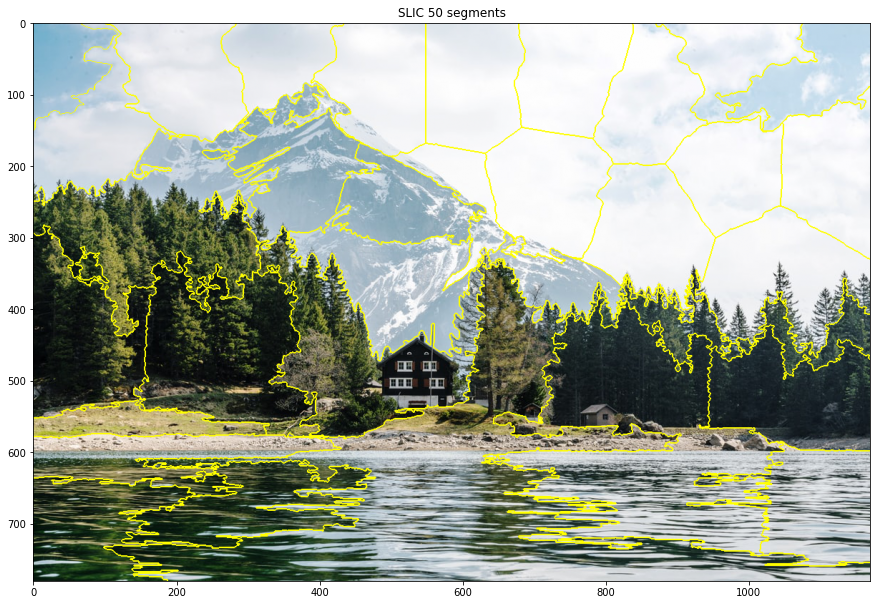

In [97]:
segments_slic_50 = slic(mountain_img, n_segments=50, compactness=10, sigma=1)
print(f"SLIC number of segments:{len(np.unique(segments_slic_50))}")

plt.figure(figsize=(15, 15))

plt.imshow(mark_boundaries(mountain_img, segments_slic_50))
plt.title('SLIC 50 segments')
plt.show()

/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_59205/1771088227.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic_100 = slic(mountain_img, n_segments=100, compactness=10, sigma=1)


SLIC number of segments:62


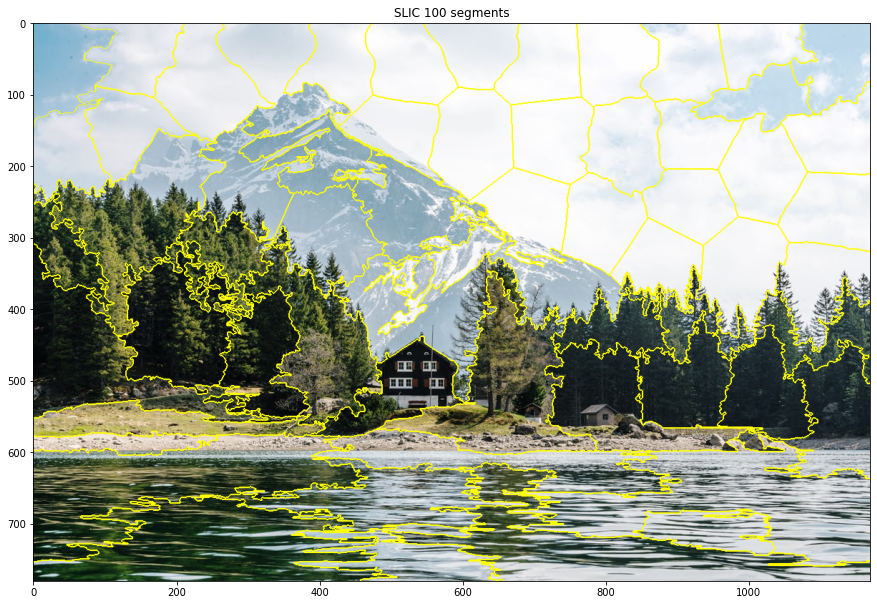

In [98]:
segments_slic_100 = slic(mountain_img, n_segments=100, compactness=10, sigma=1)
print(f"SLIC number of segments:{len(np.unique(segments_slic_100))}")

plt.figure(figsize=(15, 15))

plt.imshow(mark_boundaries(mountain_img, segments_slic_100))
plt.title('SLIC 100 segments')
plt.show()

/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_59205/264136569.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic_150 = slic(mountain_img, n_segments=150, compactness=10, sigma=1)


SLIC number of segments:112


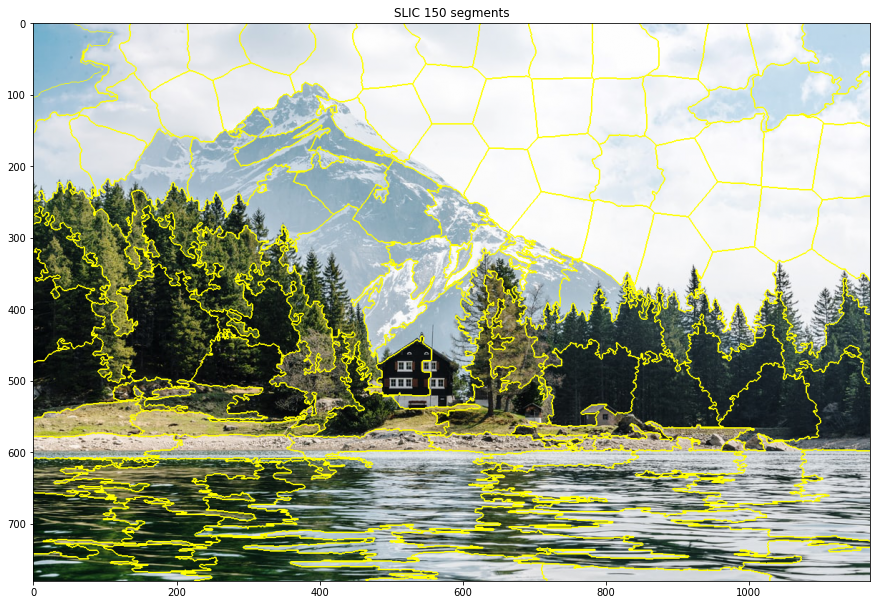

In [99]:
segments_slic_150 = slic(mountain_img, n_segments=150, compactness=10, sigma=1)
print(f"SLIC number of segments:{len(np.unique(segments_slic_150))}")

plt.figure(figsize=(15, 15))

plt.imshow(mark_boundaries(mountain_img, segments_slic_150))
plt.title('SLIC 150 segments')
plt.show()

### b. [10] Apa yang dapat disimpulkan dari percobaan pada (a)? Apakah pengaruh berbagai jumlah segmen terhadap hasil segmentasi? Jumlah segmen berapa yang menurut Anda memberikan hasil paling baik pada citra ini? Berikan penjelasannya.

Semakin banyak jumlah segmentasi, maka akan semakin banyak pula cluster yang akan di-generate.

Berdasarkan ketiga percobaan SLIC di atas, dengan segmentasi sebagai variabel bebas, terlihat bahwa hasil clustering paling ideal terletak pada segmentasi dengan nilai 100. Hal ini terlihat pada keseluruhan rumah, sebagian besar gunung, sebagian besar awan, dan sebagian besar pohon yang berhasil dipisahkan dengan cukup baik.

### c. [15] Setelah memilih jumlah segmen yang paling baik pada soal 2b, visualisasikan citra dalam bentuk penyeragaman piksel untuk setiap superpiksel yang telah disegmentasi. Gunakan nilai median untuk memilih piksel yang dipilih untuk setiap superpiksel.

In [100]:
def superpixel_mean_image(image, slic_labels):
    """
    Code taken from https://stackoverflow.com/a/57746835
    Turn image into superpixel image, given SLIC segment
    labels.
    """
    im_rp = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))
    sli_1d = np.reshape(slic_labels,-1)
    uni = np.unique(sli_1d)
    new_img = np.zeros(im_rp.shape)
    for i in uni:
        loc = np.where(sli_1d == i)[0]
        mm = np.mean(im_rp[loc,:],axis=0)
        new_img[loc,:] = mm
    return np.reshape(new_img,[image.shape[0], image.shape[1], image.shape[2]]).astype('uint8')

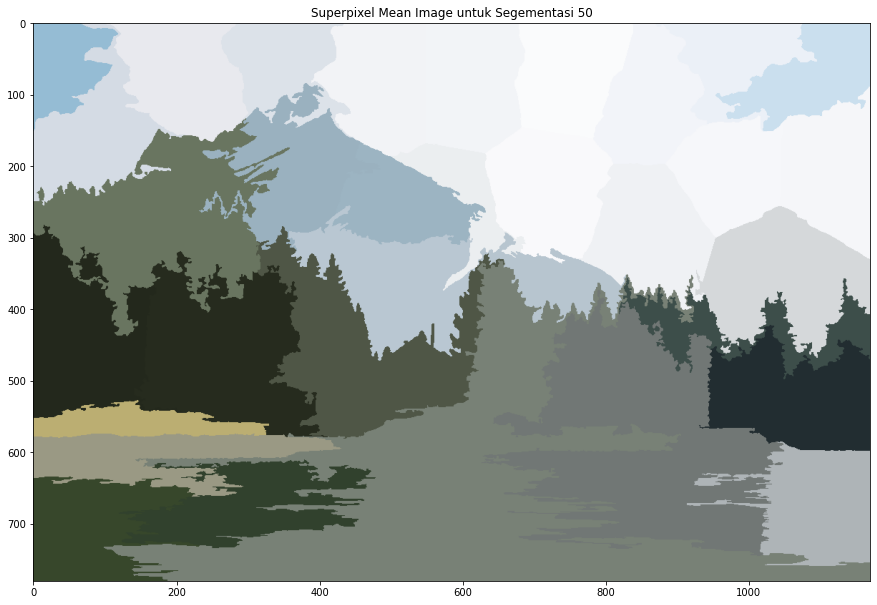

In [101]:
plt.figure(figsize=(15, 15))

superpixel_image = superpixel_mean_image(mountain_img, segments_slic_50)
plt.title("Superpixel Mean Image untuk Segementasi 50")
plt.imshow(superpixel_image)

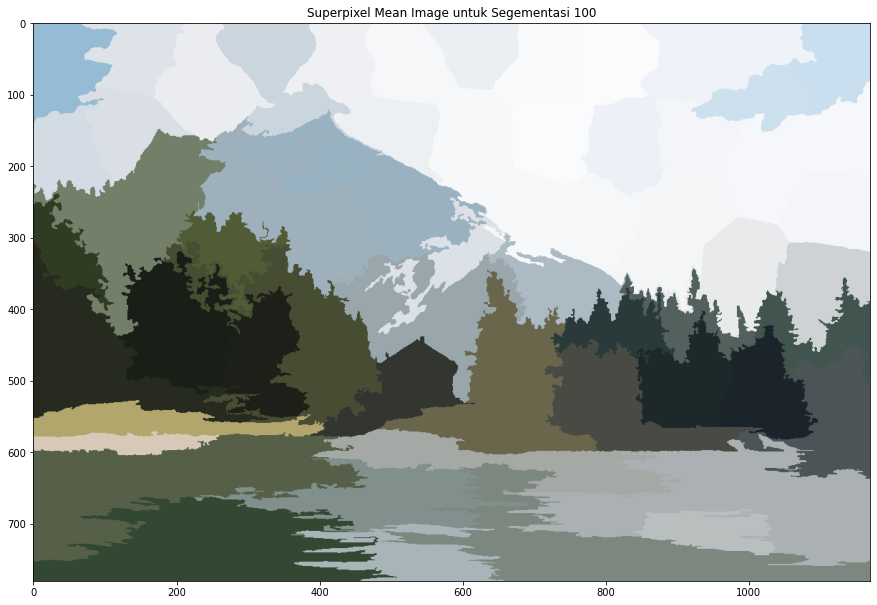

In [102]:
plt.figure(figsize=(15, 15))

superpixel_image = superpixel_mean_image(mountain_img, segments_slic_100)
plt.title("Superpixel Mean Image untuk Segementasi 100")
plt.imshow(superpixel_image)